In [1592]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from itertools import combinations

In [1593]:
def load(f):
    dataset = pd.read_csv(f)
    return dataset

In [1594]:
dataset = load("Dataset-Exos2.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Watcher             115 non-null    object
 1   videoCategoryId     115 non-null    int64 
 2   videoCategoryLabel  115 non-null    object
 3   definition          112 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.7+ KB
None


question 1 : 
- une transaction correspond au visionnage de vidéos
- un item correspond à une vidéo visionnée avec sa définition

In [1595]:
def transaction_count(dataset, attr = 'Watcher'):
    return dataset[attr].nunique()

In [1596]:
count = transaction_count(dataset)
print(count)

39


In [1597]:
def item_count(dataset, attr =  'videoCategoryId'):
    return dataset[attr].nunique()

In [1598]:
count = transaction_count(dataset)
print(count)

39


In [1599]:
def aff_nombres_manquants(dataset,attr):
    dataset_sorted=dataset.sort_values(by=attr)
    column=dataset_sorted[attr]
    manquant=0
    
    for i in column :
        if (pd.isna(i)):
            manquant+=1
    print("le nombre de valeurs manquantes est de :",manquant,"\nle pourcentage de valeurs manquantes est de:",manquant*100/len(dataset_sorted),'%')

In [1600]:
print('Watcher')
aff_nombres_manquants(dataset, 'Watcher')
print('\nvideoCategoryId')
aff_nombres_manquants(dataset, 'videoCategoryId')
print('\nvideoCategoryLabel')
aff_nombres_manquants(dataset, 'videoCategoryLabel')
print('\ndefinition')
aff_nombres_manquants(dataset, 'definition')

Watcher
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %

videoCategoryId
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %

videoCategoryLabel
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %

definition
le nombre de valeurs manquantes est de : 3 
le pourcentage de valeurs manquantes est de: 2.608695652173913 %


In [1601]:
# take all the items of the watcher 
# check the def and take the definition that's chosen the most
def replace_missing_definitions(dataset):
    # dictionary of the most common definition for each watcher
    watcher_definitions = {}

    # iterate through the unique watchers in the dataframe
    unique_watchers = dataset['Watcher'].unique()
    for watcher in unique_watchers:
        # filter the dataframe for rows belonging to the current watcher
        watcher_dataset = dataset[dataset['Watcher'] == watcher]

        # count the occurrences of each definition for the watcher
        definition_counts = watcher_dataset['definition'].value_counts()

        # get the most common definition for this watcher
        most_common_definition = definition_counts.idxmax()

        # store the most common definition in the dictionary
        watcher_definitions[watcher] = most_common_definition

    # Replace missing 'definition' values in the original dataframe
    for index, row in dataset.iterrows():
        if pd.isna(row['definition']):
            dataset.at[index, 'definition'] = watcher_definitions[row['Watcher']]

    return dataset

dataset = replace_missing_definitions(dataset)
print(dataset.at[12, 'Watcher'])
print(dataset.at[12, 'definition'])
print(dataset.at[8, 'Watcher'])
print(dataset.at[8, 'definition'])
print(dataset.at[36, 'Watcher'])
print(dataset.at[36, 'definition'])



Jane
hd
Babs
hd
Cyrus
sd


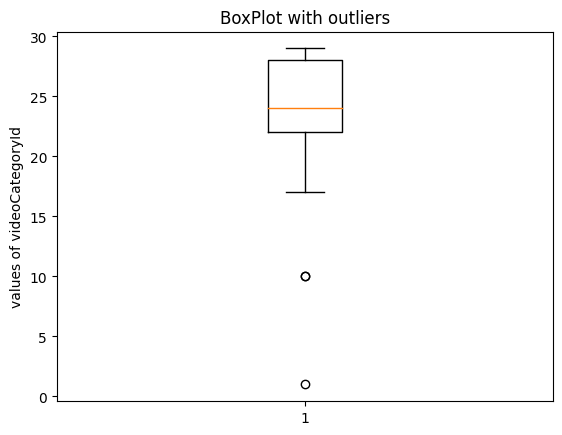

In [1602]:
def box(dataset, attr):
    x = dataset[attr]
    plt.boxplot(x)
    plt.title('BoxPlot with outliers')
    plt.ylabel(f'values of {attr}')
box(dataset, 'videoCategoryId')

In [1603]:
def remove_outliers_iqr(data, column_name):
    # Calculate the IQR for the specified column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the specified column
    data_no_outliers = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    return data_no_outliers
dataset = remove_outliers_iqr(dataset, 'videoCategoryId')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 114
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Watcher             112 non-null    object
 1   videoCategoryId     112 non-null    int64 
 2   videoCategoryLabel  112 non-null    object
 3   definition          112 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB
None


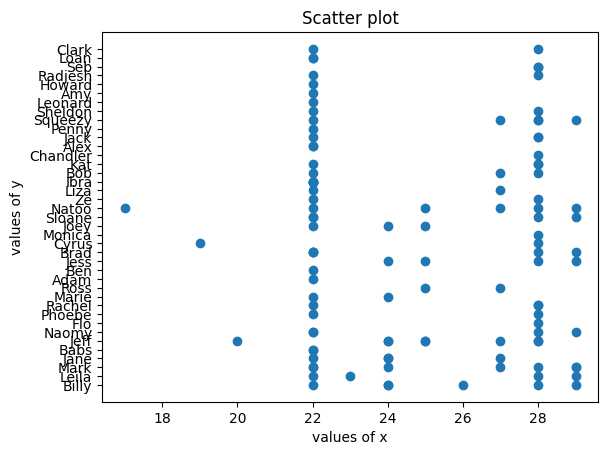

In [1604]:
def scatterplot(dataset, attr1, attr2):
    x = dataset[attr1]
    y = dataset[attr2]
    plt.scatter(x,y)
    plt.title('Scatter plot')
    plt.xlabel('values of x')
    plt.ylabel('values of y')
    plt.show()

scatterplot(dataset, 'videoCategoryId', 'Watcher')

In [1605]:

def remove_rare_video_categories(dataset,attr, threshold=1):
    # count the occurrences of each videoCategoryId
    category_counts = dataset[attr].value_counts()

    # identify categories that occur less frequently than the threshold
    rare_categories = category_counts[category_counts <= threshold].index
    print(rare_categories)

    # filter the dataset to remove rows with rare videoCategoryId values
    filtered_dataset = dataset[~dataset[attr].isin(rare_categories)]

    return filtered_dataset

dataset = remove_rare_video_categories(dataset,'videoCategoryId', threshold=1)




Int64Index([19, 17, 20, 23, 26], dtype='int64')


In [1606]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 114
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Watcher             107 non-null    object
 1   videoCategoryId     107 non-null    int64 
 2   videoCategoryLabel  107 non-null    object
 3   definition          107 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.2+ KB
None


In [1614]:
# Group by 'Watcher' and aggregate the 'videoCategoryLabel' values into lists
watched_videos_df = dataset.groupby('Watcher')['videoCategoryLabel'].apply(list).reset_index()

# Rename columns for clarity
watched_videos_df.columns = ['Watcher', 'WatchedVideos']

# Display the modified DataFrame
print(watched_videos_df)

     Watcher                                      WatchedVideos
0       Adam                                   [People & Blogs]
1       Alex                   [People & Blogs, People & Blogs]
2        Amy                                   [People & Blogs]
3       Babs                   [People & Blogs, People & Blogs]
4        Ben                                   [People & Blogs]
5      Billy  [Nonprofits & Activism, People & Blogs, Entert...
6        Bob  [People & Blogs, Science & Technology, Education]
7       Brad  [Science & Technology, People & Blogs, People ...
8   Chandler                             [Science & Technology]
9      Clark             [People & Blogs, Science & Technology]
10     Cyrus                             [Science & Technology]
11       Flo                             [Science & Technology]
12    Howard                                   [People & Blogs]
13      Ibra  [People & Blogs, People & Blogs, People & Blog...
14      Jack  [Science & Technology, Peo

In [1615]:
from itertools import combinations

# Function to generate k-itemsets candidates (Ck)
def generate_candidates(transactions, k):
    candidates = []
    for transaction in transactions:
        for candidate in combinations(transaction, k):
            candidates.append(tuple(sorted(candidate)))
    return set(candidates)

# Function to calculate the support of k-itemsets (Ck)
def calculate_support(transactions, candidates, min_support):
    itemset_counts = {}
    num_transactions = len(transactions)
    
    for candidate in candidates:
        for transaction in transactions:
            if set(candidate).issubset(set(transaction)):
                itemset_counts[candidate] = itemset_counts.get(candidate, 0) + 1
                
    
    return itemset_counts

# Function to generate frequent k-itemsets (Lk)
def generate_frequent_itemsets(transactions, k, min_support):
    candidates = generate_candidates(transactions, k)
    
    itemset_counts = calculate_support(transactions, candidates, min_support)
    # frequent_itemsets = {itemset: count / num_transactions for itemset, count in itemset_counts.items() if count / num_transactions >= min_support}
    frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count  >= min_support}
    
    return frequent_itemsets

# Sample data (use your transformed dataset)
transactions = watched_videos_df['WatchedVideos']
min_support = 0.3  # Set your minimum support here

# Apply Apriori algorithm to find frequent itemsets of different sizes (k)
for k in range(1, 4):  # Example for k from 1 to 3
    frequent_itemsets = generate_frequent_itemsets(transactions, k, min_support)
    print(f'Frequent {k}-itemsets:')
    for itemset, support in frequent_itemsets.items():
        print(f'{itemset}: Support = {support:.2f}')
    print('\n\n')



Frequent 1-itemsets:
('Education',): Support = 8.00
('Entertainment',): Support = 7.00
('Science & Technology',): Support = 24.00
('News & Politics',): Support = 5.00
('People & Blogs',): Support = 31.00
('Nonprofits & Activism',): Support = 9.00



Frequent 2-itemsets:
('People & Blogs', 'Science & Technology'): Support = 17.00
('Entertainment', 'Science & Technology'): Support = 4.00
('Education', 'Science & Technology'): Support = 5.00
('Nonprofits & Activism', 'Nonprofits & Activism'): Support = 9.00
('People & Blogs', 'People & Blogs'): Support = 31.00
('Science & Technology', 'Science & Technology'): Support = 24.00
('Entertainment', 'Nonprofits & Activism'): Support = 3.00
('Entertainment', 'People & Blogs'): Support = 5.00
('News & Politics', 'News & Politics'): Support = 5.00
('Education', 'People & Blogs'): Support = 6.00
('Nonprofits & Activism', 'Science & Technology'): Support = 9.00
('News & Politics', 'Nonprofits & Activism'): Support = 2.00
('Nonprofits & Activism', 'Pe

In [1616]:
c1 = generate_candidates(transactions, 2)
print(c1)

{('People & Blogs', 'Science & Technology'), ('Entertainment', 'Science & Technology'), ('Education', 'Science & Technology'), ('Nonprofits & Activism', 'Nonprofits & Activism'), ('People & Blogs', 'People & Blogs'), ('Science & Technology', 'Science & Technology'), ('Entertainment', 'Nonprofits & Activism'), ('Entertainment', 'People & Blogs'), ('News & Politics', 'News & Politics'), ('Education', 'People & Blogs'), ('Nonprofits & Activism', 'Science & Technology'), ('News & Politics', 'Nonprofits & Activism'), ('Nonprofits & Activism', 'People & Blogs'), ('Entertainment', 'Entertainment'), ('Education', 'Entertainment'), ('News & Politics', 'Science & Technology'), ('Entertainment', 'News & Politics'), ('Education', 'News & Politics'), ('News & Politics', 'People & Blogs'), ('Education', 'Nonprofits & Activism')}


In [1617]:
calculate_support(transactions, c1, 5)

{('People & Blogs', 'Science & Technology'): 17,
 ('Entertainment', 'Science & Technology'): 4,
 ('Education', 'Science & Technology'): 5,
 ('Nonprofits & Activism', 'Nonprofits & Activism'): 9,
 ('People & Blogs', 'People & Blogs'): 31,
 ('Science & Technology', 'Science & Technology'): 24,
 ('Entertainment', 'Nonprofits & Activism'): 3,
 ('Entertainment', 'People & Blogs'): 5,
 ('News & Politics', 'News & Politics'): 5,
 ('Education', 'People & Blogs'): 6,
 ('Nonprofits & Activism', 'Science & Technology'): 9,
 ('News & Politics', 'Nonprofits & Activism'): 2,
 ('Nonprofits & Activism', 'People & Blogs'): 8,
 ('Entertainment', 'Entertainment'): 7,
 ('Education', 'Entertainment'): 3,
 ('News & Politics', 'Science & Technology'): 3,
 ('Entertainment', 'News & Politics'): 3,
 ('Education', 'News & Politics'): 3,
 ('News & Politics', 'People & Blogs'): 2,
 ('Education', 'Nonprofits & Activism'): 3}

In [1618]:
generate_frequent_itemsets(transactions, 2, 7)

{('People & Blogs', 'Science & Technology'): 17,
 ('Nonprofits & Activism', 'Nonprofits & Activism'): 9,
 ('People & Blogs', 'People & Blogs'): 31,
 ('Science & Technology', 'Science & Technology'): 24,
 ('Nonprofits & Activism', 'Science & Technology'): 9,
 ('Nonprofits & Activism', 'People & Blogs'): 8,
 ('Entertainment', 'Entertainment'): 7}